In [2]:
import numpy as np
import pandas as pd
from torch.utils.data import Dataset
import scipy.io as io
import torch
import matplotlib.pyplot as plt


class ECG_dataset(Dataset):
    def __init__(self,base_file=None, cv=0, is_train=True, transform=None):
        # specify annotation file for dataset
        self.is_train = is_train
        self.file_list = []
        self.base_file = base_file
        
        for i in range(5):
            data = pd.read_csv(base_file+'/cv/cv'+str(i)+'.csv')
            self.file_list.append(data.to_numpy())
        self.file = None
        if is_train:
            del self.file_list[cv]
            self.file = self.file_list[0]
            for i in range(1, 4):
                self.file = np.append(self.file,self.file_list[i],axis=0)
        else:
            self.file=self.file_list[cv]

    def __len__(self):
        return self.file.shape[0]

    def load_data(self,file_name,label):
        mat_file = self.base_file+'/training2017/'+file_name+'.mat'
        data = io.loadmat(mat_file)['val']

        if label == 'N':
            one_hot=torch.tensor([0])
        elif label == 'O':
            one_hot=torch.tensor([0])
        elif label == 'A':
            one_hot=torch.tensor([1])
        elif label == '~':
            one_hot=torch.tensor([0])

        return data, one_hot

    def crop_padding(self,data,time):
        print(data.shape)
        if data.shape[0]<=time:
            data=np.pad(data, (time-data.shape[0]), 'constant')
        elif data.shape[0]>time:
            end_index=data.shape[0]-time
            start=np.random.randint(0, end_index)
            data=data[start:start+time]

        return data

    def data_process(self, data):
        data=data[::3]
        data=data-data.mean()
        data=data/data.std()
        data=self.crop_padding(data,3000)
        # data=torch.tensor(data)

        return data

    def __getitem__(self, idx):
        file_name=self.file[idx][1]
        label=self.file[idx][2]
        data,one_hot=self.load_data(file_name,label)
        data=self.data_process(data[0])

        return data, one_hot,file_name
    

(3000,)


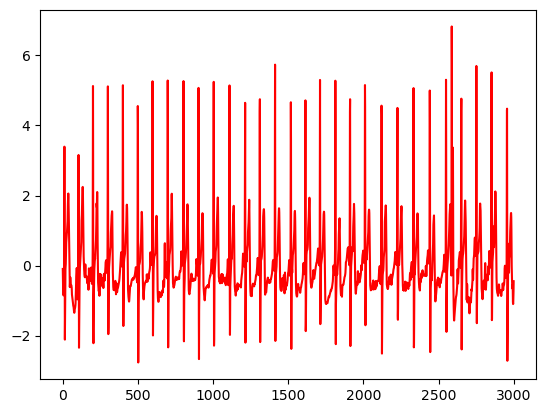

In [3]:
# data=ECG_dataset('./')
# d=data[1]
# x = np.linspace(0,3000, 3000) # x轴坐标值
# plt.plot(x, d[0],c = 'r') # 参数c为color简写，表示颜色,r为red即红色
# plt.show() # 显示图像

